## in this project we will explore Hypothesis Testing and Causal Inference models

In [113]:
%pip install --upgrade matplotlib ipykernel dowhy

import warnings

import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import scipy.stats as stats
import dowhy
from dowhy import CausalModel
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore", category=SyntaxWarning)

Note: you may need to restart the kernel to use updated packages.


c:\dev\causal_inference\lalonde\.venv\Scripts\python.exe: No module named pip


In [114]:
# reading the df
df = pd.read_csv("lalonde.csv")

In [115]:
# inspecting head
df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [116]:
#inspecting datatypes
df.dtypes

id            int64
treat         int64
age           int64
educ          int64
black         int64
hispan        int64
married       int64
nodegree      int64
re74        float64
re75        float64
re78        float64
dtype: object

In [117]:
#inspecting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        614 non-null    int64  
 1   treat     614 non-null    int64  
 2   age       614 non-null    int64  
 3   educ      614 non-null    int64  
 4   black     614 non-null    int64  
 5   hispan    614 non-null    int64  
 6   married   614 non-null    int64  
 7   nodegree  614 non-null    int64  
 8   re74      614 non-null    float64
 9   re75      614 non-null    float64
 10  re78      614 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 52.9 KB


In [118]:
# inspecting statistics
df.describe()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.301303,27.363192,10.268730,0.395765,0.117264,0.415309,0.630293,4557.546569,2184.938207,6792.834483
std,177.390811,0.459198,9.881187,2.628325,0.489413,0.321997,0.493177,0.483119,6477.964479,3295.679043,7470.730792
min,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.250000,0.000000,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.283425
50%,307.500000,0.000000,25.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1042.330000,601.548400,4759.018500
75%,460.750000,1.000000,32.000000,12.000000,1.000000,0.000000,1.000000,1.000000,7888.498250,3248.987500,10893.592500
max,614.000000,1.000000,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000


Text(0.5, 1.0, 'counts of treat')

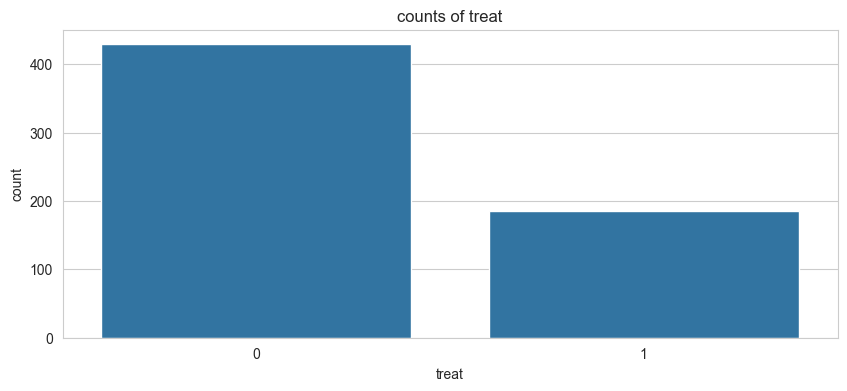

In [119]:
#inspecting how many individuals had the treatment
plt.figure(figsize=(10,4))
sns.countplot(data=df,x="treat")
plt.title("counts of treat")

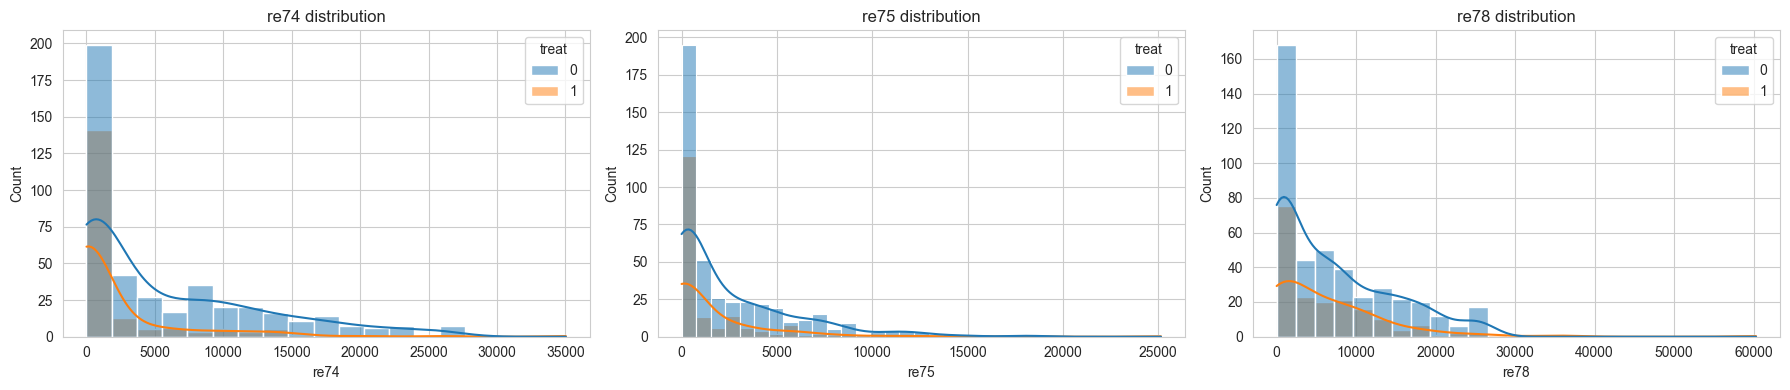

In [120]:
#plotting the distribution of incomes before and after the treatment period
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.histplot(data=df, x="re74", kde=True, hue="treat")
plt.title("re74 distribution")
plt.subplot(1,3,2)
sns.histplot(data=df, x="re75", kde=True, hue="treat")
plt.title("re75 distribution")
plt.subplot(1,3,3)
sns.histplot(data=df, x="re78", kde=True, hue="treat")
plt.title("re78 distribution")
plt.tight_layout()
plt.show()

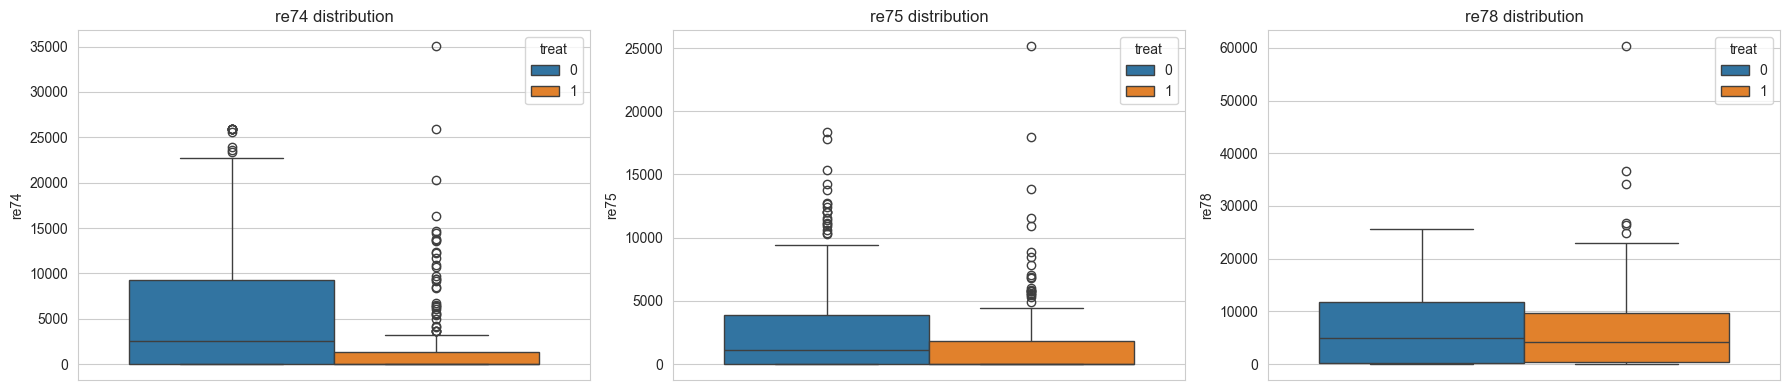

In [121]:
#plotting the distribution of incomes before and after the treatment period
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.boxplot(data=df, y="re74", hue="treat")
plt.title("re74 distribution")
plt.subplot(1,3,2)
sns.boxplot(data=df, y="re75", hue="treat")
plt.title("re75 distribution")
plt.subplot(1,3,3)
sns.boxplot(data=df, y="re78", hue="treat")
plt.title("re78 distribution")
plt.tight_layout()
plt.show()

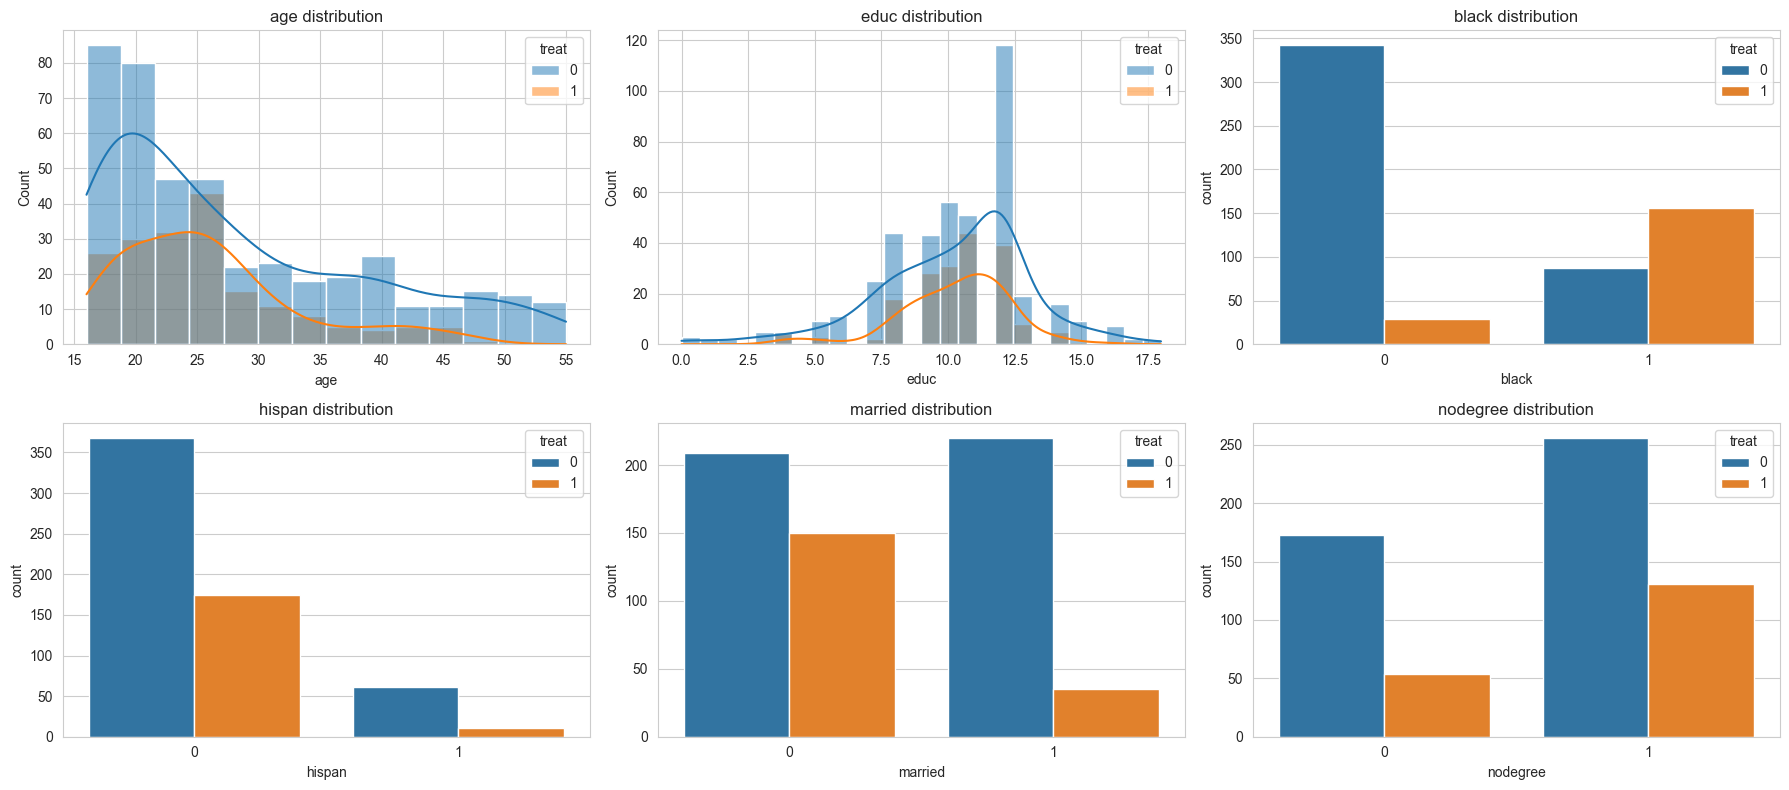

In [122]:
#plotting the distribution of the rest of features in the DataFrame
plt.figure(figsize=(18,8))
plt.subplot(2,3,1)
sns.histplot(data=df, x="age", kde=True, hue="treat")
plt.title("age distribution")
plt.subplot(2,3,2)
sns.histplot(data=df, x="educ", kde=True, hue="treat") 
plt.title("educ distribution")
plt.subplot(2,3,3)
sns.countplot(data=df, x="black", hue="treat")
plt.title("black distribution")
plt.subplot(2,3,4)
sns.countplot(data=df, x="hispan", hue="treat")
plt.title("hispan distribution")
plt.subplot(2,3,5)
sns.countplot(data=df, x="married", hue="treat")
plt.title("married distribution")
plt.subplot(2,3,6)
sns.countplot(data=df, x="nodegree", hue="treat")
plt.title("nodegree distribution")
plt.tight_layout()
plt.show()

#hispan	married	nodegree

### Notes:
age distribution - right tailed with a higher representation for the ages ranging between<br>
education distribution - bell curved<br>
black distribution - low representation<br>
hispan distribution - very low representation<br>
married distribtution - most of the subjects are single<br>
no degree distribution - most of the subjects have a degree<br> 

In [132]:
#running a T-test to see if change between treaded and control group is significant
treated_group = df[df['treat'] == 1]['re78']
control_group = df[df['treat'] == 0]['re78']

t_stat, p_value = stats.ttest_ind(treated_group, control_group)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between the two groups.")
else:
    print("No significant difference between the two groups.")

T-statistic: -0.966352225446378
P-value: 0.3342496685909654
No significant difference between the two groups.


since we failed to prove significance for the treatment<br>
we will use a causal inference model to try and estimate whether the treatment improved the salary at all


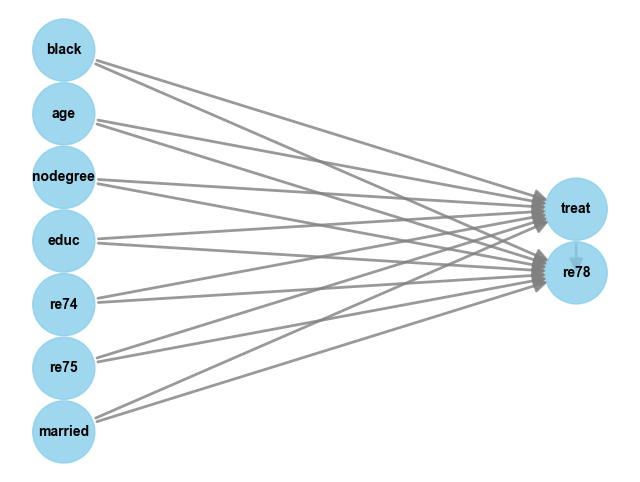

In [151]:
# defining our causal structure
# we will assume that all of the features effectr BOTH training choice and future income
# hisp is dropped due to very low representation of treatments
model = CausalModel(
    data = df,
    treatment='treat',
    outcome='re78',
    common_causes=['age', 'educ', 'black', 're74', 're75', "married", "nodegree"]
)

model.view_model()

In [152]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

#Linear regression criterion
est_reg = model.estimate_effect(identified_estimand, 
                                method_name="backdoor.linear_regression")

#Stratification criterion
est_strat = model.estimate_effect(identified_estimand, 
                                  method_name="backdoor.propensity_score_stratification")

#Weighting criterion
est_weight = model.estimate_effect(identified_estimand, 
                                   method_name="backdoor.propensity_score_weighting")

print(f"Regression Effect:     ${est_reg.value:.2f}")
print(f"Stratification Effect: ${est_strat.value:.2f}")
print(f"Weighting Effect:      ${est_weight.value:.2f}")

Regression Effect:     $1577.85
Stratification Effect: $880.00
Weighting Effect:      $415.70


In [153]:
methods = {
    "Regression": est_reg,
    "Stratification": est_strat,
    "Weighting": est_weight
}

for name, est in methods.items():
    print(f"\n--- Refuting {name} ---")
    
    #Placebo
    res_placebo = model.refute_estimate(identified_estimand, est, 
                                        method_name="placebo_treatment_refuter")
    
    #Random Common Cause
    res_random = model.refute_estimate(identified_estimand, est, 
                                       method_name="random_common_cause")
    
    print(f"{name} Placebo Effect: {res_placebo.new_effect:.2f}")
    print(f"{name} Random Cause Effect: {res_random.new_effect:.2f}")


--- Refuting Regression ---
Regression Placebo Effect: -96.82
Regression Random Cause Effect: 1579.42

--- Refuting Stratification ---
Stratification Placebo Effect: -71.11
Stratification Random Cause Effect: 880.00

--- Refuting Weighting ---
Weighting Placebo Effect: 1963.29
Weighting Random Cause Effect: 415.70


In [154]:
def calculate_smd(data, feature, treatment_col):
    t1 = data[data[treatment_col] == 1][feature]
    t0 = data[data[treatment_col] == 0][feature]
    
    mean_diff = np.mean(t1) - np.mean(t0)
    std_pooled = np.sqrt((np.var(t1) + np.var(t0)) / 2)
    return mean_diff / std_pooled

# Calculate SMD
features = ['age', 'educ', 'black', 're74', 're75', "married", "nodegree"]
print("--- Standardized Mean Differences (Raw) ---")
for f in features:
    smd = calculate_smd(df, f, 'treat')
    print(f"{f}: {smd:.4f}")

--- Standardized Mean Differences (Raw) ---
age: -0.2423
educ: 0.0448
black: 1.6708
re74: -0.5968
re75: -0.2876
married: -0.7208
nodegree: 0.2355


In [150]:
#subset refutation for regression
res_subset = model.refute_estimate(identified_estimand, est_reg,
                                   method_name="data_subset_refuter", 
                                   subset_fraction=0.9)
print(f"\nSubset Refutation Regressions (Sensitivity): {res_subset.new_effect:.2f}")
#subset refutation for Stratification 
res_subset = model.refute_estimate(identified_estimand, est_strat,
                                   method_name="data_subset_refuter", 
                                   subset_fraction=0.9)
print(f"\nSubset Refutation Stratification (Sensitivity): {res_subset.new_effect:.2f}")
#subset refutation for Weighting
res_subset = model.refute_estimate(identified_estimand, est_weight,
                                   method_name="data_subset_refuter", 
                                   subset_fraction=0.9)
print(f"\nSubset Refutation Weighting (Sensitivity): {res_subset.new_effect:.2f}")


Subset Refutation Regressions (Sensitivity): 1585.94

Subset Refutation Stratification (Sensitivity): 2015.52

Subset Refutation Weighting (Sensitivity): 433.35


### FINAL NOTES
* Linear regression
1. Showed a contribution of ~1,577 $ for the treatment group
2. Placebo test passed successfully
3. Sensetivity was stable
* Strafication
1. Showed a contribution of 880 $ for the treatment group
2. Placebo test passed successfully
3. Sensetivity was un-stable
* Weighting
1. Showed a contribution of ~415 $ for the treatment group
2. Placebo test failed
3. Sensetivity was stable

* SMD - 
1. most of the subjects to begin with were earning less
2. a certain ethnic grouo were heavily trained with the program

* Conclusion - the Linear regression model is the most promising with a contribution of ~1,577 $